<a href="https://colab.research.google.com/github/DivyaRIyer/Covid19_ITVedantHackathon/blob/main/Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading all the datasets

In [132]:
AgeGroupDetails = pd.read_csv('AgeGroupDetails.csv')
HospitalBedsIndia = pd.read_csv('HospitalBedsIndia.csv')
ICMRTestingDetails = pd.read_csv('ICMRTestingDetails.csv')
ICMRTestingLabs = pd.read_csv('ICMRTestingLabs.csv')
IndividualDetails = pd.read_csv('IndividualDetails.csv')
covid_19_india = pd.read_csv('covid_19_india.csv')
population_india_census2011 = pd.read_csv('population_india_census2011.csv')

Getting to know each dataset & Cleaning

In [133]:
AgeGroupDetails.head(15)

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%
5,6,50-59,77,11.13%
6,7,60-69,89,12.86%
7,8,70-79,28,4.05%
8,9,>=80,10,1.45%
9,10,Missing,9,1.30%


As frequency of cases is highest in age group 20-29, adding the missing category to 20-29 age group

In [134]:
AgeGroupDetails.loc[(AgeGroupDetails['AgeGroup']=='20-29'),'TotalCases']=181
AgeGroupDetails.loc[(AgeGroupDetails['AgeGroup']=='20-29'),'Percentage']='26.16%'
AgeGroupDetails.drop(9,axis=0,inplace=True)
AgeGroupDetails.head(10)

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,181,26.16%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%
5,6,50-59,77,11.13%
6,7,60-69,89,12.86%
7,8,70-79,28,4.05%
8,9,>=80,10,1.45%


In [135]:
#Removing the % sign
AgeGroupDetails['Percentage'] = AgeGroupDetails['Percentage'].str.rstrip('%').astype('float')

In [136]:
AgeGroupDetails.drop('Sno',axis=1,inplace=True)

In [137]:
AgeGroupDetails.head()

,AgeGroup,TotalCases,Percentage
0,0-9,22,3.18
1,10-19,27,3.90
2,20-29,181,26.16
3,30-39,146,21.10
4,40-49,112,16.18


As frequency of cases is highest in age group 20-29, adding the missing category to 20-29 age group

As we have our working community within the age group 20 to 70 we can observe the percentage of covid cases are pretty high within these age groups 

In [138]:
HospitalBedsIndia.head()

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18,Unnamed: 12,Unnamed: 13
0,1.0,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27.0,575.0,3.0,500.0,NaN,NaN
1,2.0,Andhra Pradesh,1417,198,31,20,1666,60799,193.0,6480.0,65.0,16658.0,NaN,NaN
2,3.0,Arunachal Pradesh,122,62,NaN,15,199,2320,208.0,2136.0,10.0,268.0,NaN,NaN
3,4.0,Assam,1007,166,14,33,1220,19115,1176.0,10944.0,50.0,6198.0,NaN,NaN
4,5.0,Bihar,2007,63,33,43,2146,17796,930.0,6083.0,103.0,5936.0,NaN,NaN


In [139]:
HospitalBedsIndia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sno                               37 non-null     float64
 1   State/UT                          37 non-null     object 
 2   NumPrimaryHealthCenters_HMIS      37 non-null     object 
 3   NumCommunityHealthCenters_HMIS    37 non-null     object 
 4   NumSubDistrictHospitals_HMIS      30 non-null     object 
 5   NumDistrictHospitals_HMIS         37 non-null     object 
 6   TotalPublicHealthFacilities_HMIS  37 non-null     object 
 7   NumPublicBeds_HMIS                37 non-null     object 
 8   NumRuralHospitals_NHP18           37 non-null     float64
 9   NumRuralBeds_NHP18                37 non-null     float64
 10  NumUrbanHospitals_NHP18           37 non-null     float64
 11  NumUrbanBeds_NHP18                37 non-null     float64
 12  Unnamed: 1

Column NumSubDistrictHospitals_HMIS has few missing values, Column 12 and 13 has all the values missing hence has to be dropped

In [140]:
HospitalBedsIndia.drop(HospitalBedsIndia[['Sno','Unnamed: 12','Unnamed: 13']],axis=1,inplace=True)

Handling missing values / Junk Values

In [141]:
HospitalBedsIndia['NumPrimaryHealthCenters_HMIS'].unique()

array(['27', '1417', '122', '1007', '2007', '40', '813', '9', '4', '534',
       '31', '1770', '500', '516', '702', '343', '2547', '933', '1420',
       '2638', '87', '138', '65', '134', '1360', '521', '2463', '25',
       '1854', '788', '114', '3277', '275', '1374', '29,899', nan],
      dtype=object)

In [142]:
HospitalBedsIndia['NumCommunityHealthCenters_HMIS'].unique()

array(['4', '198', '62', '166', '63', '2', '25', '385', '131', '79', '87',
       '179', '207', '229', '3', '324', '430', '17', '29', '10', '21',
       '377', '146', '579', '82', '22', '671', '69', '406', '5,568', nan],
      dtype=object)

In [143]:
HospitalBedsIndia['NumSubDistrictHospitals_HMIS'].unique()

array([nan, '31', '14', '33', '1', '12', '9', '2', '44', '24', '61', '13',
       '147', '82', '72', '101', '3', '27', '5', '47', '64', '310', '19',
       '70', '1,255'], dtype=object)

NumSubDistrictHospitals_HMIS      30 non-null     object 
 5   NumDistrictHospitals_HMIS         37 non-null     object 
 6   TotalPublicHealthFacilities_HMIS  37 non-null     object 
 7   NumPublicBeds_HMIS

In [144]:
HospitalBedsIndia['NumDistrictHospitals_HMIS'].unique()

array(['3', '20', '15', '33', '43', '4', '32', '1', '2', '47', '37', '28',
       '29', '23', '42', '53', '51', '70', '9', '13', '11', '35', '174',
       '55', '1,003', nan], dtype=object)

In [145]:
HospitalBedsIndia['TotalPublicHealthFacilities_HMIS'].unique()

array(['34', '1666', '199', '1220', '2146', '47', '1023', '13', '8',
       '615', '40', '2236', '683', '671', '818', '558', '2943', '1297',
       '10', '1867', '3239', '114', '180', '87', '166', '1799', '53',
       '742', '3139', '32', '2581', '932', '157', '4122', '383', '1905',
       '37,725', nan], dtype=object)

In [146]:
HospitalBedsIndia['NumPublicBeds_HMIS'].unique()

array(['1246', '60799', '2320', '19115', '17796', '3756', '14354', '568',
       '298', '20572', '2666', '41129', '13841', '8706', '11342', '7404',
       '56333', '39511', '250', '38140', '68998', '2562', '4585', '2312',
       '1944', '16497', '4462', '13527', '51844', '1145', '72616',
       '17358', '4895', '58310', '6660', '51163', '7,39,024', nan],
      dtype=object)

All the above column has missing values

In [147]:
#Columns with nan values
columns = ['NumPrimaryHealthCenters_HMIS','NumCommunityHealthCenters_HMIS','NumSubDistrictHospitals_HMIS','NumDistrictHospitals_HMIS','TotalPublicHealthFacilities_HMIS','NumPublicBeds_HMIS']

In [148]:
for column in columns:
  HospitalBedsIndia[column] = HospitalBedsIndia[column].str.replace(',','').astype(float)
  print("Column: {}".format(column),end='  ')
  print("Mean : {}".format(HospitalBedsIndia[column].mean()),end=',')
  print("Median : {}".format(HospitalBedsIndia[column].median()))

Column: NumPrimaryHealthCenters_HMIS  Mean : 1616.162162162162,Median : 521.0
Column: NumCommunityHealthCenters_HMIS  Mean : 300.97297297297297,Median : 82.0
Column: NumSubDistrictHospitals_HMIS  Mean : 83.66666666666667,Median : 25.5
Column: NumDistrictHospitals_HMIS  Mean : 54.21621621621622,Median : 23.0
Column: TotalPublicHealthFacilities_HMIS  Mean : 2039.1891891891892,Median : 683.0
Column: NumPublicBeds_HMIS  Mean : 39947.24324324324,Median : 13527.0


Values in all the columns are highly skewed, replacing values with median

In [149]:
for column in columns:
  HospitalBedsIndia[column].fillna(HospitalBedsIndia[column].median(),inplace=True)

In [150]:
HospitalBedsIndia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   State/UT                          37 non-null     object 
 1   NumPrimaryHealthCenters_HMIS      38 non-null     float64
 2   NumCommunityHealthCenters_HMIS    38 non-null     float64
 3   NumSubDistrictHospitals_HMIS      38 non-null     float64
 4   NumDistrictHospitals_HMIS         38 non-null     float64
 5   TotalPublicHealthFacilities_HMIS  38 non-null     float64
 6   NumPublicBeds_HMIS                38 non-null     float64
 7   NumRuralHospitals_NHP18           37 non-null     float64
 8   NumRuralBeds_NHP18                37 non-null     float64
 9   NumUrbanHospitals_NHP18           37 non-null     float64
 10  NumUrbanBeds_NHP18                37 non-null     float64
dtypes: float64(10), object(1)
memory usage: 3.4+ KB


In [151]:
HospitalBedsIndia[HospitalBedsIndia['NumUrbanBeds_NHP18'].isnull()]

,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
37,NaN,521.0,82.0,25.5,23.0,683.0,13527.0,NaN,NaN,NaN,NaN


We can observe the above row covers single missing value for all the rest columns, hence dropping the row

In [152]:
HospitalBedsIndia.drop(37,axis=0,inplace=True)

In [153]:
HospitalBedsIndia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   State/UT                          37 non-null     object 
 1   NumPrimaryHealthCenters_HMIS      37 non-null     float64
 2   NumCommunityHealthCenters_HMIS    37 non-null     float64
 3   NumSubDistrictHospitals_HMIS      37 non-null     float64
 4   NumDistrictHospitals_HMIS         37 non-null     float64
 5   TotalPublicHealthFacilities_HMIS  37 non-null     float64
 6   NumPublicBeds_HMIS                37 non-null     float64
 7   NumRuralHospitals_NHP18           37 non-null     float64
 8   NumRuralBeds_NHP18                37 non-null     float64
 9   NumUrbanHospitals_NHP18           37 non-null     float64
 10  NumUrbanBeds_NHP18                37 non-null     float64
dtypes: float64(10), object(1)
memory usage: 3.5+ KB


In [154]:
ICMRTestingDetails.head()

,SNo,DateTime,TotalSamplesTested,TotalIndividualsTested,TotalPositiveCases,Source
0,1,13/03/20 18:00,6500.0,5900.0,78.0,Press_Release_ICMR_13March2020.pdf
1,2,18/03/20 18:00,13125.0,12235.0,150.0,ICMR_website_update_18March_6PM_IST.pdf
2,3,19/03/20 18:00,14175.0,13285.0,182.0,ICMR_website_update_19March_6PM_IST.pdf
3,4,20/03/20 18:00,15404.0,14514.0,236.0,ICMR_website_update_20March_6PM_IST.pdf
4,5,21/03/20 18:00,16911.0,16021.0,315.0,ICMR_website_update_21March_6PM_IST.pdf


In [155]:
ICMRTestingDetails.shape

(24, 6)

Handling DateTime Column

In [156]:
ICMRTestingDetails['Dates'] = pd.to_datetime(ICMRTestingDetails['DateTime']).dt.date
ICMRTestingDetails['Time'] = pd.to_datetime(ICMRTestingDetails['DateTime']).dt.time

In [157]:
ICMRTestingDetails.drop('DateTime',axis=1,inplace=True)

Removing columns SNo and Source

In [158]:
ICMRTestingDetails.drop(ICMRTestingDetails[['SNo','Source']],axis=1,inplace=True)
ICMRTestingDetails.head()

,TotalSamplesTested,TotalIndividualsTested,TotalPositiveCases,Dates,Time
0,6500.0,5900.0,78.0,2020-03-13,18:00:00
1,13125.0,12235.0,150.0,2020-03-18,18:00:00
2,14175.0,13285.0,182.0,2020-03-19,18:00:00
3,15404.0,14514.0,236.0,2020-03-20,18:00:00
4,16911.0,16021.0,315.0,2020-03-21,18:00:00


In [159]:
ICMRTestingLabs.head()

,lab,address,pincode,city,state,type
0,"ICMR-Regional Medical Research Centre, Port Blair","ICMR-Regional Medical Research Centre, Post Ba...",744103,Port Blair,Andaman and Nicobar Islands,Government Laboratory Supported
1,Tomo Riba Institute of Health & Medical Scienc...,"National Highway 52A, Old Assembly Complex, Na...",791110,Naharlagun,Arunachal Pradesh,Collection Site
2,Sri Venkateswara Institute of Medical Sciences...,Sri Venkateswara Institute of Medical Sciences...,517507,Tirupati,Andhra Pradesh,Government Laboratory Supported
3,"Rangaraya Medical College, Kakinada","Rangaraya Medical College, Kakinada Pithampura...",533001,Kakinada,Andhra Pradesh,Government Laboratory Supported
4,"Sidhartha Medical College, Vijaywada","Siddhartha Medical College, Vijayawada NH 16 S...",520008,Vijayawada,Andhra Pradesh,Government Laboratory Supported


In [160]:
ICMRTestingLabs.shape

(213, 6)

In [161]:
ICMRTestingLabs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lab      213 non-null    object
 1   address  213 non-null    object
 2   pincode  213 non-null    int64 
 3   city     213 non-null    object
 4   state    213 non-null    object
 5   type     213 non-null    object
dtypes: int64(1), object(5)
memory usage: 10.1+ KB


We do not have any missing or junk values in ICMRTestingLabs dataset

In [162]:
IndividualDetails.head()

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
0,0,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
1,1,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
2,2,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
3,3,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,Recovered,15/03/2020,"Travelled from Austria, Italy"
4,4,TS-P1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,India,Recovered,02/03/2020,"Travelled from Dubai to Bangalore on 20th Feb,..."


In [163]:
IndividualDetails.shape

(6821, 12)

In [164]:
IndividualDetails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6821 entries, 0 to 6820
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  6821 non-null   int64 
 1   government_id       1308 non-null   object
 2   diagnosed_date      6821 non-null   object
 3   age                 1074 non-null   object
 4   gender              1672 non-null   object
 5   detected_city       922 non-null    object
 6   detected_district   5472 non-null   object
 7   detected_state      6821 non-null   object
 8   nationality         1174 non-null   object
 9   current_status      6820 non-null   object
 10  status_change_date  6711 non-null   object
 11  notes               5631 non-null   object
dtypes: int64(1), object(11)
memory usage: 639.6+ KB


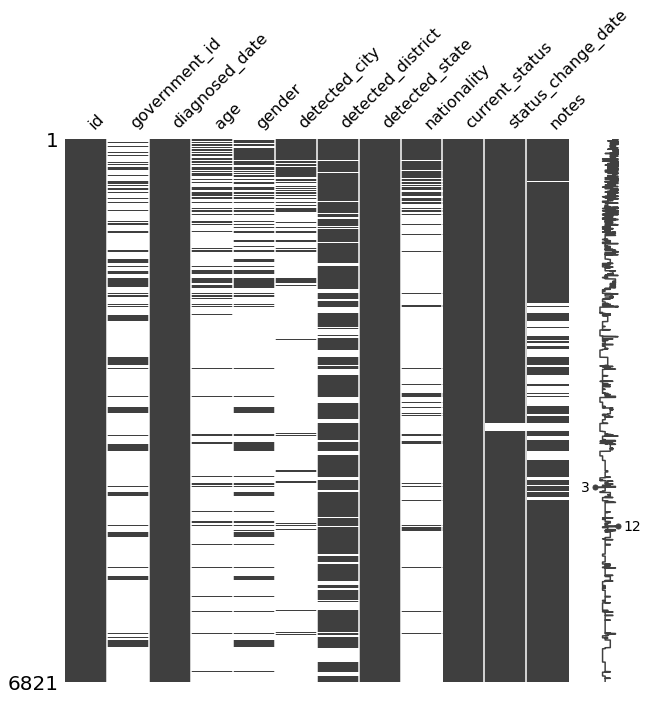

In [165]:
import missingno as msno
msno.matrix(IndividualDetails,figsize=(10, 10))

In [166]:
covid_19_india.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1.0,30/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1.0
1,2.0,31/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2,3.0,01/02/20,6:00 PM,Kerala,2,0,0.0,0.0,2.0
3,4.0,02/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0
4,5.0,03/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0


In [167]:
covid_19_india.shape

(806, 9)

In [168]:
covid_19_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806 entries, 0 to 805
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sno                       801 non-null    float64
 1   Date                      801 non-null    object 
 2   Time                      801 non-null    object 
 3   State/UnionTerritory      801 non-null    object 
 4   ConfirmedIndianNational   801 non-null    object 
 5   ConfirmedForeignNational  801 non-null    object 
 6   Cured                     801 non-null    float64
 7   Deaths                    801 non-null    float64
 8   Confirmed                 801 non-null    float64
dtypes: float64(4), object(5)
memory usage: 56.8+ KB


We do not have any missing values in covid_19_info dataset

In [169]:
covid_19_india.drop('Sno',axis=1,inplace=True)

In [170]:
covid_19_india['State/UnionTerritory'].fillna('Kerala',inplace=True)

In [171]:
population_india_census2011.head()

,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931


In [172]:
population_india_census2011.shape

(36, 8)

In [173]:
population_india_census2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Sno                      36 non-null     int64 
 1   State / Union Territory  36 non-null     object
 2   Population               36 non-null     int64 
 3   Rural population         36 non-null     int64 
 4   Urban population         36 non-null     int64 
 5   Area                     36 non-null     object
 6   Density                  36 non-null     object
 7   Gender Ratio             36 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 2.4+ KB


We do not have any missing values

In [174]:
population_india_census2011.drop('Sno',axis=1,inplace=True)

Crosschecking dataset

In [175]:
AgeGroupDetails.head()

,AgeGroup,TotalCases,Percentage
0,0-9,22,3.18
1,10-19,27,3.90
2,20-29,181,26.16
3,30-39,146,21.10
4,40-49,112,16.18


In [176]:
HospitalBedsIndia.head()

,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,Andaman & Nicobar Islands,27.0,4.0,25.5,3.0,34.0,1246.0,27.0,575.0,3.0,500.0
1,Andhra Pradesh,1417.0,198.0,31.0,20.0,1666.0,60799.0,193.0,6480.0,65.0,16658.0
2,Arunachal Pradesh,122.0,62.0,25.5,15.0,199.0,2320.0,208.0,2136.0,10.0,268.0
3,Assam,1007.0,166.0,14.0,33.0,1220.0,19115.0,1176.0,10944.0,50.0,6198.0
4,Bihar,2007.0,63.0,33.0,43.0,2146.0,17796.0,930.0,6083.0,103.0,5936.0


In [177]:
ICMRTestingDetails.head()

,TotalSamplesTested,TotalIndividualsTested,TotalPositiveCases,Dates,Time
0,6500.0,5900.0,78.0,2020-03-13,18:00:00
1,13125.0,12235.0,150.0,2020-03-18,18:00:00
2,14175.0,13285.0,182.0,2020-03-19,18:00:00
3,15404.0,14514.0,236.0,2020-03-20,18:00:00
4,16911.0,16021.0,315.0,2020-03-21,18:00:00


In [178]:
ICMRTestingLabs.head()

,lab,address,pincode,city,state,type
0,"ICMR-Regional Medical Research Centre, Port Blair","ICMR-Regional Medical Research Centre, Post Ba...",744103,Port Blair,Andaman and Nicobar Islands,Government Laboratory Supported
1,Tomo Riba Institute of Health & Medical Scienc...,"National Highway 52A, Old Assembly Complex, Na...",791110,Naharlagun,Arunachal Pradesh,Collection Site
2,Sri Venkateswara Institute of Medical Sciences...,Sri Venkateswara Institute of Medical Sciences...,517507,Tirupati,Andhra Pradesh,Government Laboratory Supported
3,"Rangaraya Medical College, Kakinada","Rangaraya Medical College, Kakinada Pithampura...",533001,Kakinada,Andhra Pradesh,Government Laboratory Supported
4,"Sidhartha Medical College, Vijaywada","Siddhartha Medical College, Vijayawada NH 16 S...",520008,Vijayawada,Andhra Pradesh,Government Laboratory Supported


In [179]:
covid_19_india.head()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,30/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1.0
1,31/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2,01/02/20,6:00 PM,Kerala,2,0,0.0,0.0,2.0
3,02/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0
4,03/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0


In [180]:
population_india_census2011.head()

,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931


Handling DateTime

In [181]:
ICMRTestingDetails['Dates'] =  pd.to_datetime(ICMRTestingDetails['Dates'])
covid_19_india['Date'] =  pd.to_datetime(covid_19_india['Date'])
covid_19_india['Time'] =  pd.to_datetime(covid_19_india['Time'])

In [182]:
ICMRTestingDetails.head()

,TotalSamplesTested,TotalIndividualsTested,TotalPositiveCases,Dates,Time
0,6500.0,5900.0,78.0,2020-03-13,18:00:00
1,13125.0,12235.0,150.0,2020-03-18,18:00:00
2,14175.0,13285.0,182.0,2020-03-19,18:00:00
3,15404.0,14514.0,236.0,2020-03-20,18:00:00
4,16911.0,16021.0,315.0,2020-03-21,18:00:00


In [183]:
covid_19_india.head()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,2020-01-30,2021-02-21 18:00:00,Kerala,1,0,0.0,0.0,1.0
1,2020-01-31,2021-02-21 18:00:00,Kerala,1,0,0.0,0.0,1.0
2,2020-01-02,2021-02-21 18:00:00,Kerala,2,0,0.0,0.0,2.0
3,2020-02-02,2021-02-21 18:00:00,Kerala,3,0,0.0,0.0,3.0
4,2020-03-02,2021-02-21 18:00:00,Kerala,3,0,0.0,0.0,3.0


Handling Categorical data

In [184]:
dataset = [AgeGroupDetails,HospitalBedsIndia,ICMRTestingDetails,ICMRTestingLabs,covid_19_india,population_india_census2011]

In [185]:
AgeGroupDetails.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AgeGroup    9 non-null      object 
 1   TotalCases  9 non-null      int64  
 2   Percentage  9 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 288.0+ bytes


In [186]:
from sklearn.preprocessing import LabelEncoder

In [187]:
df_cat = AgeGroupDetails.select_dtypes(object)
df_num = AgeGroupDetails.select_dtypes(['float64','int64'])
for col in df_cat:
  le = LabelEncoder()
  df_cat[col] = le.fit_transform(df_cat[col])
AgeGroupDetails_New = pd.concat([df_num,df_cat],axis=1)

In [188]:
df_cat = HospitalBedsIndia.select_dtypes(object)
df_num = HospitalBedsIndia.select_dtypes(['float64','int64'])
for col in df_cat:
  le = LabelEncoder()
  df_cat[col] = le.fit_transform(df_cat[col])
HospitalBedsIndia_New = pd.concat([df_num,df_cat],axis=1)

In [189]:
df_cat = ICMRTestingDetails.select_dtypes(object)
df_num = ICMRTestingDetails.select_dtypes(['float64','int64'])
for col in df_cat:
  le = LabelEncoder()
  df_cat[col] = le.fit_transform(df_cat[col])
ICMRTestingDetails_New = pd.concat([df_num,df_cat],axis=1)

In [190]:
df_cat = ICMRTestingLabs.select_dtypes(object)
df_num = ICMRTestingLabs.select_dtypes(['float64','int64'])
for col in df_cat:
  le = LabelEncoder()
  df_cat[col] = le.fit_transform(df_cat[col])
ICMRTestingLabs_New = pd.concat([df_num,df_cat],axis=1)

In [191]:
le = LabelEncoder()
covid_19_india['State/UnionTerritory'] = le.fit_transform(covid_19_india['State/UnionTerritory'])

In [193]:
df_cat = population_india_census2011.select_dtypes(object)
df_num = population_india_census2011.select_dtypes(['float64','int64'])
for col in df_cat:
  le = LabelEncoder()
  df_cat[col] = le.fit_transform(df_cat[col])
population_india_census2011_New = pd.concat([df_num,df_cat],axis=1)